# Предсказание  следующего хода

K/k — король  

Q/q — ферзь  

R/r — ладья  

B/b — слон  

N/n — конь  

P/p — пешка  

#### Расшифровка записи

7k/5p1p/p2p1Pr1/1p4pQ/8/P1P5/2pr3P/2R2K2 w - - 0 1  

w : ход белых  

— : рокировка невозможна  

— : нет возможности взятия на проходе  

0 : 0 полуходов прошло с последнего хода пешки или взятия  

1 : первый полный ход партии (начало)  

In [3]:
path_dataset_1 = 'data/fens_training_set.csv'

path_dataset_2 = 'data/fens_processed_no_turn.csv'

## 2. Датасет

In [4]:
from utils.dataset import ChessOneHotDataset, ChessDataset
import torch


dataset = ChessDataset(path_dataset_2)
for board, castling, label in dataset:
    print(board.shape)  # torch.Size([13, 8, 8])
    print(castling.shape)     # torch.Size([4])
    print(label)        # метка движения (int)
    break


dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True)

for board, castling, label in dataloader:
    print(board.shape)  # torch.Size([13, 8, 8])
    print(castling.shape)     # torch.Size([4])
    print(label.shape) 
    break


torch.Size([13, 8, 8])
torch.Size([4])
tensor(2517)
torch.Size([1, 13, 8, 8])
torch.Size([1, 4])
torch.Size([1])


## 3. Модель

In [5]:
from utils.models import  ChessVisionTransformer

model = ChessVisionTransformer()

logits = model(board, castling)

print(logits.shape)  # [batch_size, 4096]


torch.Size([1, 4096])


In [6]:
logits

tensor([[-0.3240,  0.0491, -0.2972,  ...,  0.9264,  0.3882, -0.1899]],
       grad_fn=<AddmmBackward0>)

## Тренировка

In [ ]:

from utils.train import train_kfold, train_model
from torch.utils.data import Dataset, DataLoader
from utils.dataset import create_data_loaders_from_csv

dataset = ChessDataset(path_dataset_2)

train_loader, val_loader = create_data_loaders_from_csv(dataset, batch_size=1024, val_split=0.3)


In [6]:



from utils.models import  ChessVisionTransformer

model = ChessVisionTransformer()


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


ChessVisionTransformer(
  (patch_embed): PatchEmbedding(
    (proj): Conv2d(13, 256, kernel_size=(1, 1), stride=(1, 1))
  )
  (dropout): Dropout(p=0.1, inplace=False)
  (transformer_blocks): ModuleList(
    (0-5): 6 x TransformerEncoderBlock(
      (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
      (attn): MultiheadAttention(
        (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)
      )
      (norm2): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
      (mlp): Sequential(
        (0): Linear(in_features=256, out_features=512, bias=True)
        (1): GELU(approximate='none')
        (2): Dropout(p=0.1, inplace=False)
        (3): Linear(in_features=512, out_features=256, bias=True)
        (4): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (castling_fc): Linear(in_features=4, out_features=256, bias=True)
  (norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
  (head): Linear(in_features=256, out_features=4

In [7]:

# model.load_state_dict(torch.load("save_model/vit_model.pth", map_location=torch.device(device)))  

Epoch 1/50


Train loss: 6.4223, acc: 0.0244
Val   loss: 6.1456, acc: 0.0368
Saved best model with val acc: 0.0368
------------------------------
Epoch 2/50


Train loss: 6.0711, acc: 0.0386
Val   loss: 5.9100, acc: 0.0517
Saved best model with val acc: 0.0517
------------------------------
Epoch 3/50


Train loss: 5.7371, acc: 0.0594
Val   loss: 5.3871, acc: 0.0755
Saved best model with val acc: 0.0755
------------------------------
Epoch 4/50


Train loss: 5.1916, acc: 0.0796
Val   loss: 4.8004, acc: 0.1004
Saved best model with val acc: 0.1004
------------------------------
Epoch 5/50


Train loss: 4.6363, acc: 0.1022
Val   loss: 4.2628, acc: 0.1230
Saved best model with val acc: 0.1230
------------------------------
Epoch 6/50


Train loss: 4.1985, acc: 0.1257
Val   loss: 3.9097, acc: 0.1497
Saved best model with val acc: 0.1497
------------------------------
Epoch 7/50


Train loss: 3.8840, acc: 0.1508
Val   loss: 3.6306, acc: 0.1752
Saved best model with val acc: 0.1752
------------------------------
Epoch 8/50


Train loss: 3.6541, acc: 0.1682
Val   loss: 3.4290, acc: 0.1953
Saved best model with val acc: 0.1953
------------------------------
Epoch 9/50


Train loss: 3.4696, acc: 0.1860
Val   loss: 3.2763, acc: 0.2121
Saved best model with val acc: 0.2121
------------------------------
Epoch 10/50


Train loss: 3.3272, acc: 0.2010
Val   loss: 3.1546, acc: 0.2267
Saved best model with val acc: 0.2267
------------------------------
Epoch 11/50


Train loss: 3.2022, acc: 0.2157
Val   loss: 3.0382, acc: 0.2433
Saved best model with val acc: 0.2433
------------------------------
Epoch 12/50


Train loss: 3.0956, acc: 0.2296
Val   loss: 2.9417, acc: 0.2594
Saved best model with val acc: 0.2594
------------------------------
Epoch 13/50


Train loss: 3.0005, acc: 0.2433
Val   loss: 2.8648, acc: 0.2714
Saved best model with val acc: 0.2714
------------------------------
Epoch 14/50


Train loss: 2.9114, acc: 0.2566
Val   loss: 2.7880, acc: 0.2853
Saved best model with val acc: 0.2853
------------------------------
Epoch 15/50


Train loss: 2.8261, acc: 0.2710
Val   loss: 2.7115, acc: 0.3004
Saved best model with val acc: 0.3004
------------------------------
Epoch 16/50


Train loss: 2.7514, acc: 0.2830
Val   loss: 2.6530, acc: 0.3151
Saved best model with val acc: 0.3151
------------------------------
Epoch 17/50


Train loss: 2.6799, acc: 0.2957
Val   loss: 2.5837, acc: 0.3301
Saved best model with val acc: 0.3301
------------------------------
Epoch 18/50


Train loss: 2.6073, acc: 0.3077
Val   loss: 2.5325, acc: 0.3414
Saved best model with val acc: 0.3414
------------------------------
Epoch 19/50


Train loss: 2.5410, acc: 0.3218
Val   loss: 2.4753, acc: 0.3601
Saved best model with val acc: 0.3601
------------------------------
Epoch 20/50


Train loss: 2.4751, acc: 0.3338
Val   loss: 2.4229, acc: 0.3725
Saved best model with val acc: 0.3725
------------------------------
Epoch 21/50


Train loss: 2.4095, acc: 0.3479
Val   loss: 2.3874, acc: 0.3764
Saved best model with val acc: 0.3764
------------------------------
Epoch 22/50


Train loss: 2.3511, acc: 0.3591
Val   loss: 2.3267, acc: 0.3942
Saved best model with val acc: 0.3942
------------------------------
Epoch 23/50


Train loss: 2.2894, acc: 0.3712
Val   loss: 2.2641, acc: 0.4120
Saved best model with val acc: 0.4120
------------------------------
Epoch 24/50


Train loss: 2.2310, acc: 0.3843
Val   loss: 2.2423, acc: 0.4194
Saved best model with val acc: 0.4194
------------------------------
Epoch 25/50


Train loss: 2.1780, acc: 0.3950
Val   loss: 2.1924, acc: 0.4311
Saved best model with val acc: 0.4311
------------------------------
Epoch 26/50


Train loss: 2.1229, acc: 0.4077
Val   loss: 2.1526, acc: 0.4447
Saved best model with val acc: 0.4447
------------------------------
Epoch 27/50


Train loss: 2.0686, acc: 0.4183
Val   loss: 2.1181, acc: 0.4551
Saved best model with val acc: 0.4551
------------------------------
Epoch 28/50


Train loss: 2.0204, acc: 0.4304
Val   loss: 2.0721, acc: 0.4686
Saved best model with val acc: 0.4686
------------------------------
Epoch 29/50


Train loss: 1.9674, acc: 0.4430
Val   loss: 2.0490, acc: 0.4749
Saved best model with val acc: 0.4749
------------------------------
Epoch 30/50


Train loss: 1.9170, acc: 0.4545
Val   loss: 2.0012, acc: 0.4930
Saved best model with val acc: 0.4930
------------------------------
Epoch 31/50


Train loss: 1.8708, acc: 0.4648
Val   loss: 1.9842, acc: 0.4982
Saved best model with val acc: 0.4982
------------------------------
Epoch 32/50


Train loss: 1.8254, acc: 0.4761
Val   loss: 1.9633, acc: 0.5085
Saved best model with val acc: 0.5085
------------------------------
Epoch 33/50


Train loss: 1.7833, acc: 0.4849
Val   loss: 1.9268, acc: 0.5187
Saved best model with val acc: 0.5187
------------------------------
Epoch 34/50


Train loss: 1.7440, acc: 0.4965
Val   loss: 1.9054, acc: 0.5328
Saved best model with val acc: 0.5328
------------------------------
Epoch 35/50


Train loss: 1.7016, acc: 0.5063
Val   loss: 1.8889, acc: 0.5352
Saved best model with val acc: 0.5352
------------------------------
Epoch 36/50


Train loss: 1.6593, acc: 0.5160
Val   loss: 1.8641, acc: 0.5475
Saved best model with val acc: 0.5475
------------------------------
Epoch 37/50


Train loss: 1.6277, acc: 0.5242
Val   loss: 1.8278, acc: 0.5573
Saved best model with val acc: 0.5573
------------------------------
Epoch 38/50


Train loss: 1.5951, acc: 0.5318
Val   loss: 1.8221, acc: 0.5653
Saved best model with val acc: 0.5653
------------------------------
Epoch 39/50


Train loss: 1.5573, acc: 0.5419
Val   loss: 1.7902, acc: 0.5750
Saved best model with val acc: 0.5750
------------------------------
Epoch 40/50


Train loss: 1.5214, acc: 0.5512
Val   loss: 1.7884, acc: 0.5774
Saved best model with val acc: 0.5774
------------------------------
Epoch 41/50


Train loss: 1.4873, acc: 0.5601
Val   loss: 1.7730, acc: 0.5861
Saved best model with val acc: 0.5861
------------------------------
Epoch 42/50


Train loss: 1.4574, acc: 0.5673
Val   loss: 1.7509, acc: 0.5927
Saved best model with val acc: 0.5927
------------------------------
Epoch 43/50


Train loss: 1.4298, acc: 0.5735
Val   loss: 1.7509, acc: 0.5962
Saved best model with val acc: 0.5962
------------------------------
Epoch 44/50


Train loss: 1.4029, acc: 0.5820
Val   loss: 1.7346, acc: 0.6040
Saved best model with val acc: 0.6040
------------------------------
Epoch 45/50


Train loss: 1.3774, acc: 0.5892
Val   loss: 1.7180, acc: 0.6131
Saved best model with val acc: 0.6131
------------------------------
Epoch 46/50


Train loss: 1.3556, acc: 0.5943
Val   loss: 1.7154, acc: 0.6102
------------------------------
Epoch 47/50


Train loss: 1.3300, acc: 0.6012
Val   loss: 1.6888, acc: 0.6225
Saved best model with val acc: 0.6225
------------------------------
Epoch 48/50


Train loss: 1.3051, acc: 0.6085
Val   loss: 1.6822, acc: 0.6267
Saved best model with val acc: 0.6267
------------------------------
Epoch 49/50


Train loss: 1.2821, acc: 0.6143
Val   loss: 1.6754, acc: 0.6306
Saved best model with val acc: 0.6306
------------------------------
Epoch 50/50


Train loss: 1.2553, acc: 0.6214
Val   loss: 1.6748, acc: 0.6330
Saved best model with val acc: 0.6330
------------------------------


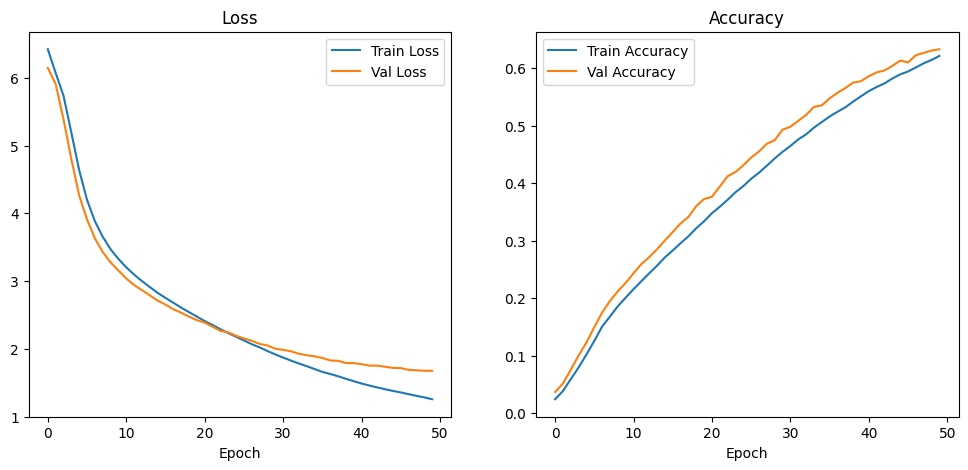

In [9]:

train_model(model, train_loader, val_loader, device=device, epochs=50, lr=1e-3, save_path="save_model/vit_model.pth", model_name="VIT")